In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  mysql.connector
from scipy.stats import ttest_ind
import scipy.stats as stats


In [2]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    port=3305,    
    user="root",
    password="vinay",
    database="inventroy"
)


df=pd.read_sql( "select * from vendor_final_table", conn)
df.head(10)


C:\Users\HP\AppData\Local\Temp\ipykernel_19092\232073648.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql( "select * from vendor_final_table", conn)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,totalpurchasesquantity,totalpurchasesdollar,totalSalesQuantity,totalSalesDollars,totalSalesPrice,totalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchasesratio
0,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,5.0,80.45,63.96,3.94,7555.42,-118753.75,-1.476119e+05,0.000675,0.000677
1,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,5.0,174.95,139.96,1.96,7555.42,-118659.25,-6.782466e+04,0.000675,0.001472
2,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,1.0,3.99,3.99,0.05,7555.42,-118830.21,-2.978201e+06,0.000135,0.000034
3,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,1.0,34.99,34.99,0.79,7555.42,-118799.21,-3.395233e+05,0.000135,0.000294
4,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,4.0,43.96,32.97,3.15,7555.42,-118790.24,-2.702235e+05,0.000540,0.000370
5,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,9.0,179.91,99.95,7.09,7555.42,-118654.29,-6.595203e+04,0.001216,0.001514
6,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,3.0,152.97,152.97,2.37,7555.42,-118681.23,-7.758464e+04,0.000405,0.001287
7,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,6.0,137.94,137.94,4.74,7555.42,-118696.26,-8.604920e+04,0.000810,0.001161
8,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,27.0,26.73,4.95,1.42,7555.42,-118807.47,-4.444724e+05,0.003647,0.000225
9,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750,7404.0,118834.2,2.0,63.98,63.98,3.68,7555.42,-118770.22,-1.856365e+05,0.000270,0.000538


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32894 entries, 0 to 32893
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VendorNumber            32894 non-null  int64  
 1   VendorName              32894 non-null  object 
 2   Brand                   32894 non-null  int64  
 3   Description             32894 non-null  object 
 4   PurchasePrice           32894 non-null  float64
 5   Actualprice             32894 non-null  float64
 6   Volume                  32894 non-null  int64  
 7   totalpurchasesquantity  32894 non-null  float64
 8   totalpurchasesdollar    32894 non-null  float64
 9   totalSalesQuantity      32877 non-null  float64
 10  totalSalesDollars       32877 non-null  float64
 11  totalSalesPrice         32877 non-null  float64
 12  totalExciseTax          32877 non-null  float64
 13  FreightCost             32894 non-null  float64
 14  GrossProfit             32877 non-null

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,32894.0,7731.546483,4739.053522,4.800000e+02,3960.000000,8112.000000,12546.000000,98450.000000
Brand,32894.0,2846.041345,1156.462471,5.800000e+01,2121.000000,3100.000000,3764.000000,4565.000000
PurchasePrice,32894.0,20.480655,20.243667,7.100000e-01,9.370000,15.710000,25.317500,240.590000
Actualprice,32894.0,28.062755,27.021085,9.900000e-01,12.990000,21.990000,34.990000,319.990000
Volume,32894.0,929.200614,483.808856,5.000000e+01,750.000000,750.000000,1000.000000,1750.000000
totalpurchasesquantity,32894.0,348.976470,816.585297,1.000000e+00,36.000000,107.000000,292.000000,9065.000000
totalpurchasesdollar,32894.0,4533.793513,12169.319794,7.100000e-01,732.450000,1480.880000,3137.750000,118834.200000
totalSalesQuantity,32877.0,13.305776,26.385904,1.000000e+00,2.000000,5.000000,13.000000,281.000000
totalSalesDollars,32877.0,221.717921,350.146895,3.990000e+00,47.960000,110.970000,239.840000,3599.000000
totalSalesPrice,32877.0,121.294835,121.539126,3.990000e+00,37.980000,77.940000,159.900000,779.800000


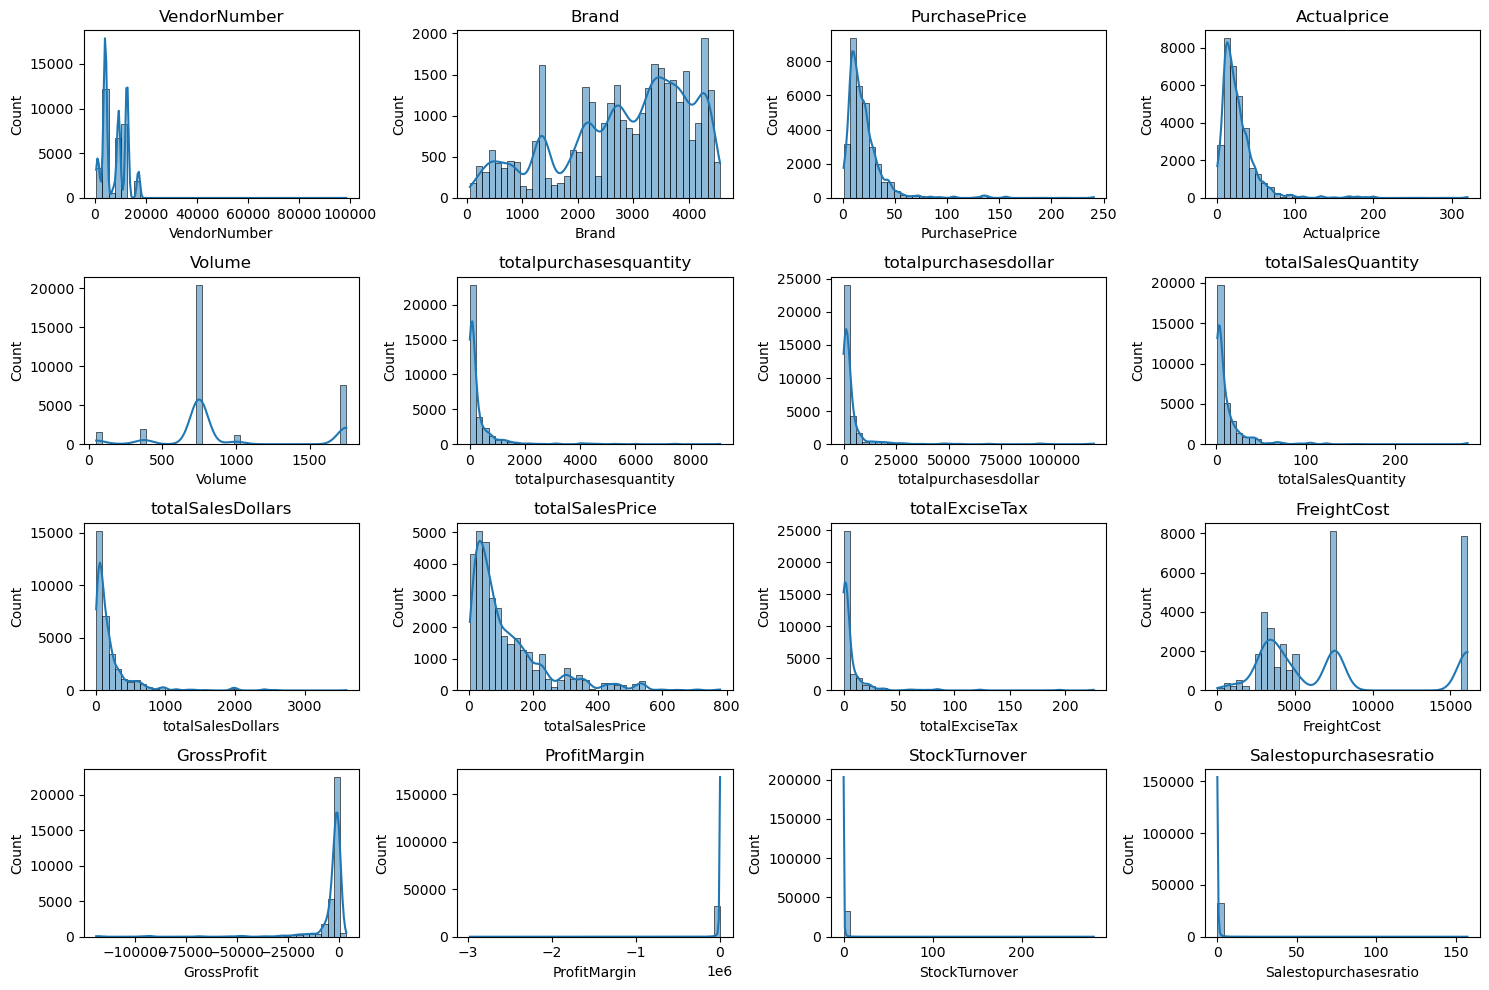

In [5]:
#Distribution Plots for Numerical Columns
numeric_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()

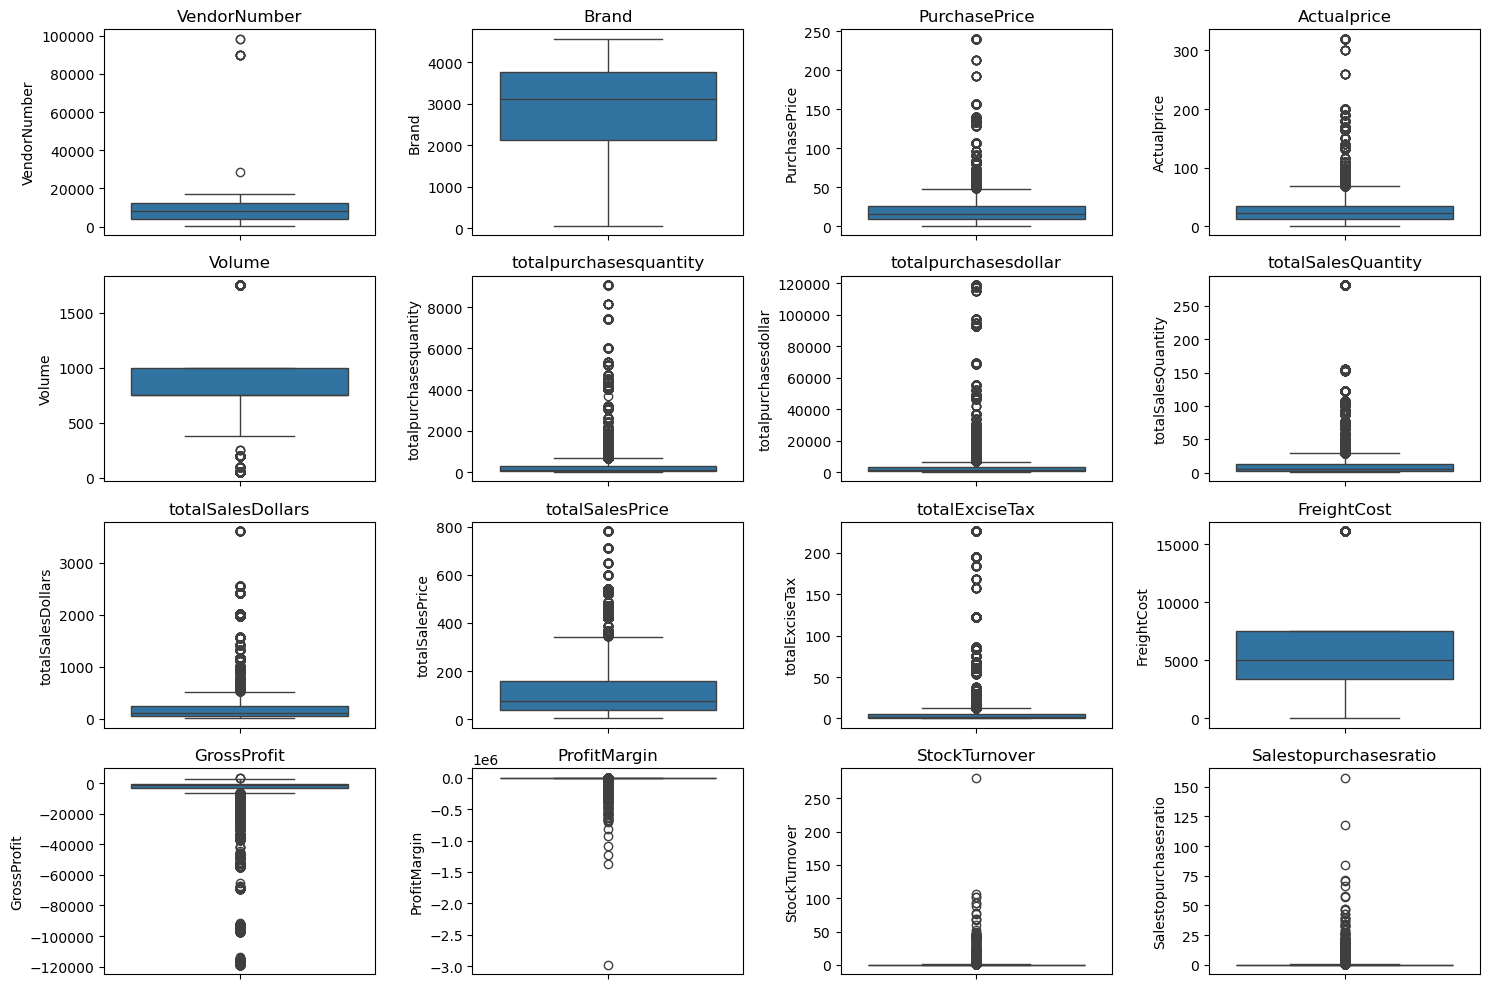

In [6]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
df=pd.read_sql("""select  
                  * from vendor_final_table 
                   where  GrossProfit >0 and ProfitMargin >0 and totalSalesQuantity >0""",conn)

C:\Users\HP\AppData\Local\Temp\ipykernel_19092\350253058.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql("""select


In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,totalpurchasesquantity,totalpurchasesdollar,totalSalesQuantity,totalSalesDollars,totalSalesPrice,totalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchasesratio
0,1128,BROWN-FORMAN CORP,1595,Gentleman Jack,10.93,15.99,375,290.0,3169.70,100.0,3599.00,647.82,183.74,3854.06,429.30,11.928313,0.344828,1.135439
1,1128,BROWN-FORMAN CORP,2518,Woodford Reserve Double Oak,36.49,49.99,750,84.0,3065.16,100.0,3599.00,647.82,183.74,3854.06,533.84,14.833009,1.190476,1.174164
2,1128,BROWN-FORMAN CORP,1465,Woodford Rsv Bourbon,11.02,14.99,375,242.0,2666.84,100.0,3599.00,647.82,183.74,3854.06,932.16,25.900528,0.413223,1.349537
3,1128,BROWN-FORMAN CORP,62,Herradura Silver Tequila,28.67,36.99,750,90.0,2580.30,100.0,3599.00,647.82,183.74,3854.06,1018.70,28.305085,1.111111,1.394799
4,17035,PERNOD RICARD USA,1896,The Glenlivet 18 Yr Single,68.83,94.99,750,36.0,2477.88,107.0,2558.93,597.75,84.25,4993.54,81.05,3.167339,2.972222,1.032709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,167.88,97.93,1.33,3151.86,156.61,93.286872,12.000000,14.896185
2125,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,3.0,110.97,110.97,2.37,3151.86,99.70,89.844102,3.000000,9.846495
2126,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,94.68,63.12,1.33,3151.86,83.41,88.096747,12.000000,8.401065
2127,8664,"STOLI GROUP,(USA) LLC",3147,Stolichnaya Chocolat Kokonut,0.71,0.99,50,1.0,0.71,14.0,111.86,95.88,0.70,1234.46,111.15,99.365278,14.000000,157.549296


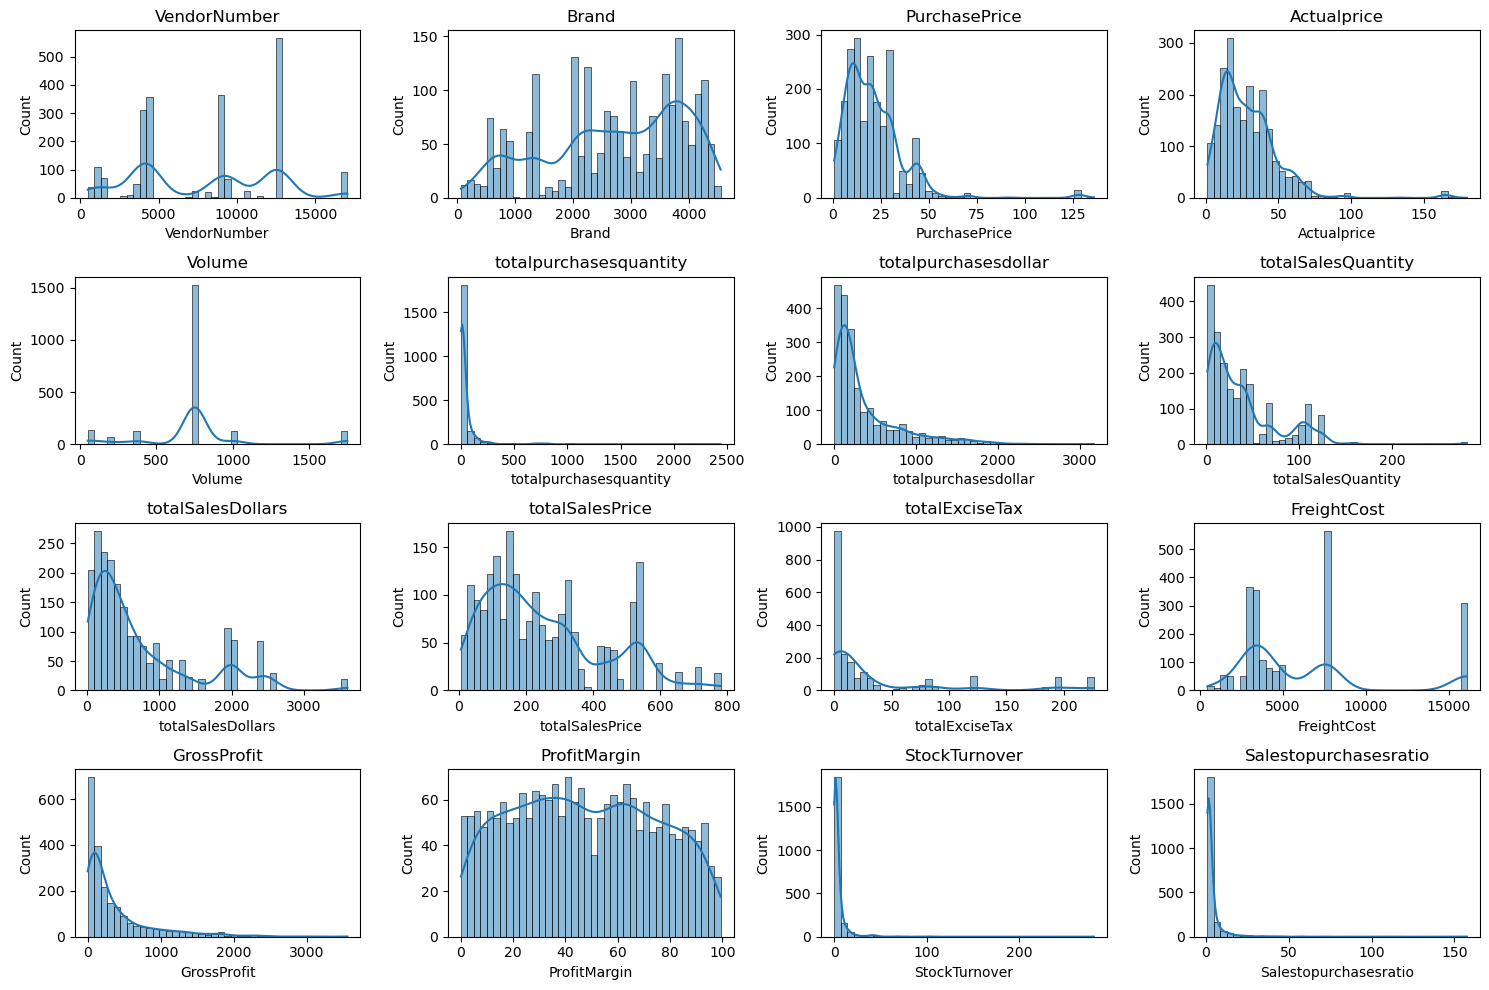

In [9]:
numeric_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=40)
    plt.title(col)
plt.tight_layout()
plt.show()

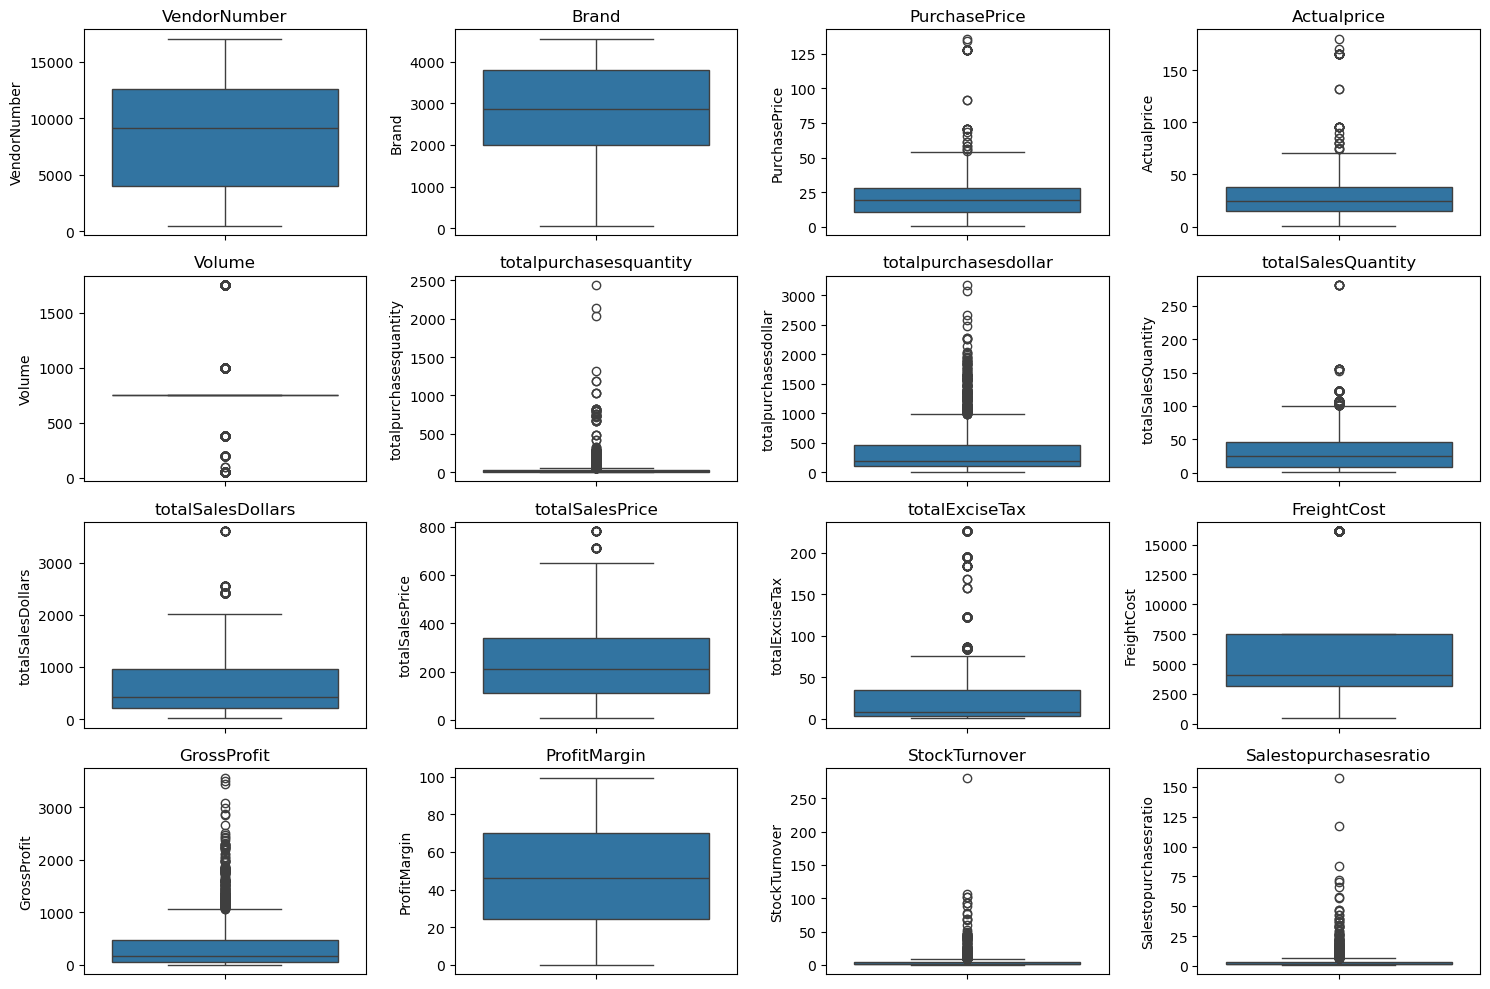

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

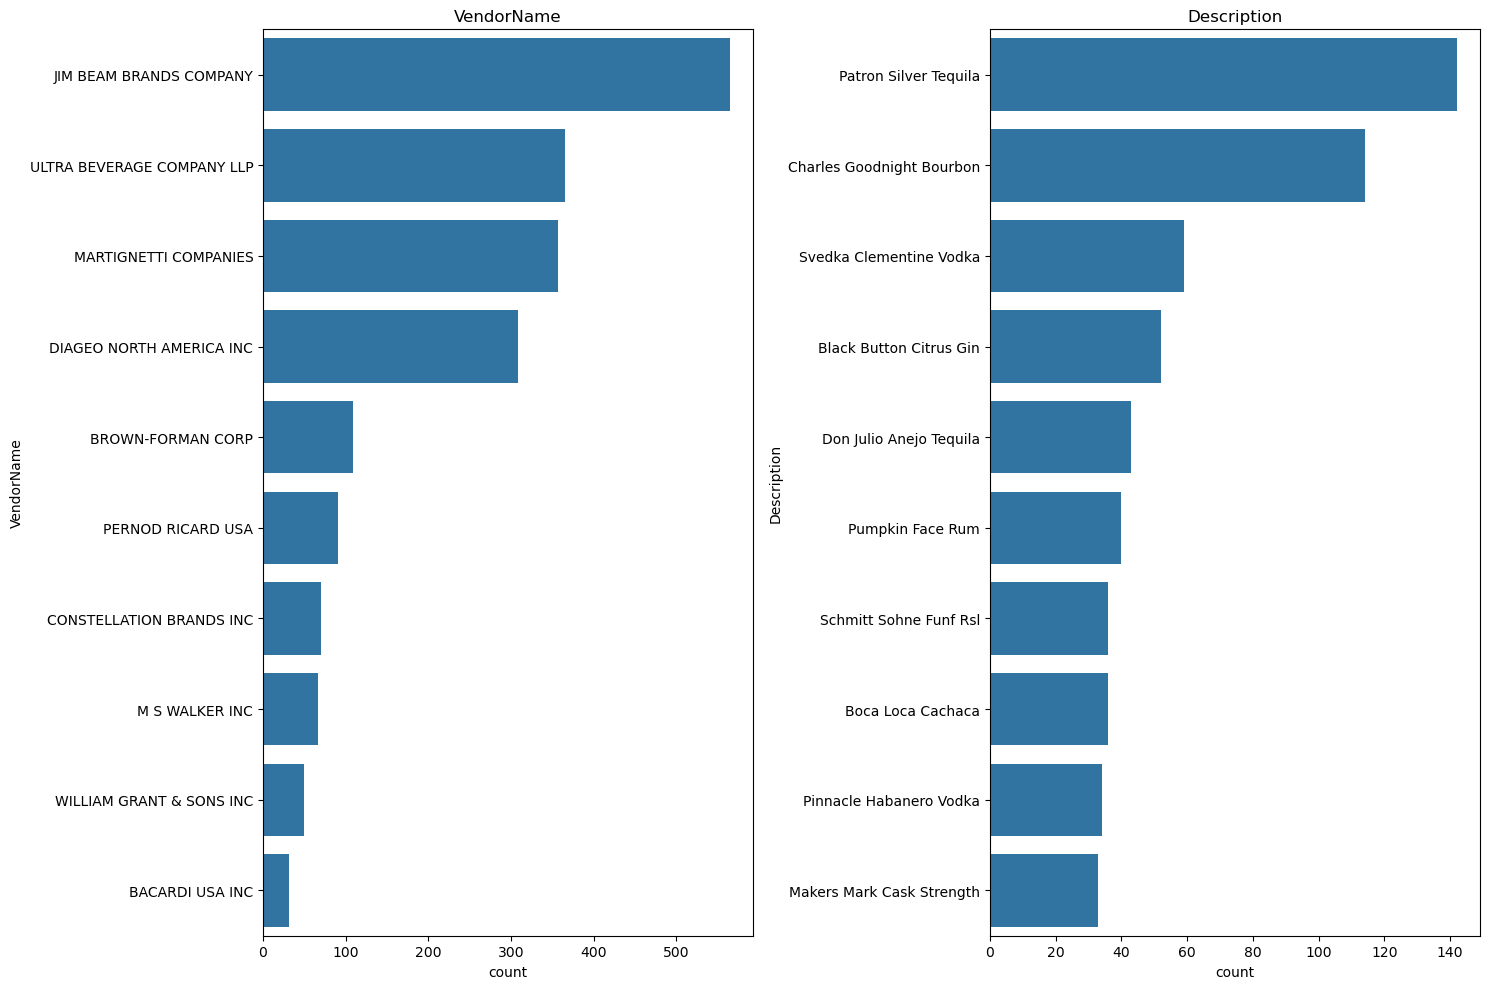

In [11]:
cols=["VendorName","Description"]
plt.figure(figsize=(15,10))
for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:
df[numeric_cols].columns

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'Actualprice', 'Volume',
       'totalpurchasesquantity', 'totalpurchasesdollar', 'totalSalesQuantity',
       'totalSalesDollars', 'totalSalesPrice', 'totalExciseTax', 'FreightCost',
       'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'Salestopurchasesratio'],
      dtype='object')

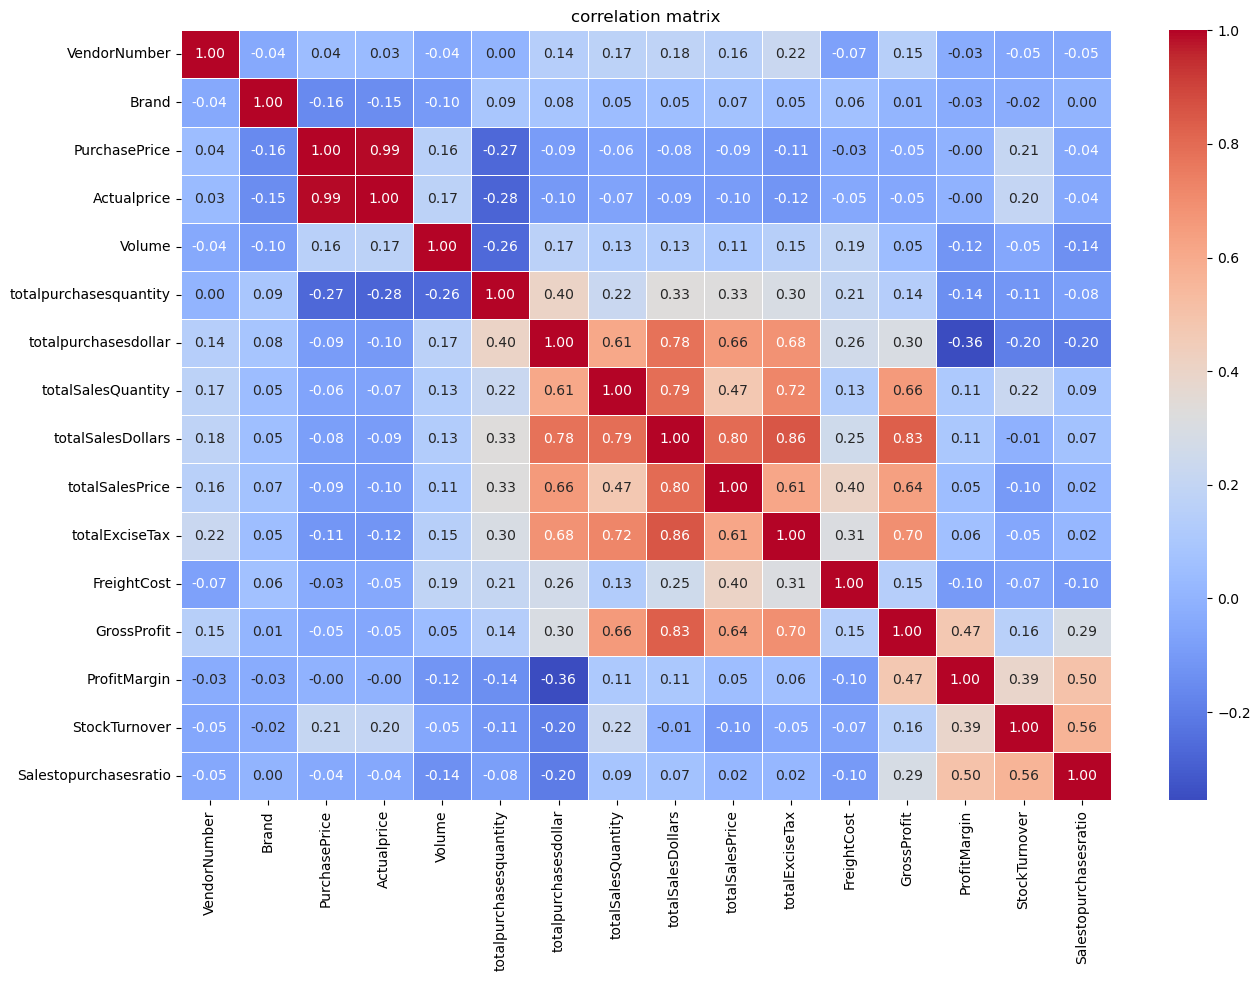

In [13]:
#correlation Heatmap
plt.figure(figsize=(15,10))
correlation=df[numeric_cols].corr()
sns.heatmap(correlation ,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("correlation matrix")
plt.show()

In [14]:
brand_performance=df.groupby("Description").agg({"totalSalesDollars":"sum","ProfitMargin":"mean"}).reset_index()

In [15]:
brand_performance

,Description,totalSalesDollars,ProfitMargin
0,(RI) 1,11531.98,43.248223
1,Aberfeldy 12 Yr Single Malt,2632.18,51.869577
2,Absolut Apeach,4526.46,45.267356
3,Absolut Berri Acai,5591.29,46.178342
4,Absolut Citron,9052.92,50.682498
...,...,...,...
321,William Grant Scotch,1961.64,32.888523
322,WolfHound Irish Whiskey,802.27,5.169083
323,Woodford Reserve Bourbon,5946.12,45.372506
324,Woodford Reserve Double Oak,3599.00,14.833009


In [16]:

#brand_performance.to_excel("brand_performance1.xlsx", index=False)



low sales and high profit

In [18]:
lowsales=brand_performance["totalSalesDollars"].quantile(0.25)
lowsales


2009.3300000000004

In [19]:
highprofit=brand_performance["ProfitMargin"].quantile(0.75)
highprofit

45.35589719125136

In [20]:
targetbrands=brand_performance[(brand_performance["totalSalesDollars"] <= lowsales) & (brand_performance["ProfitMargin"] >=highprofit)]

In [21]:
targetbrands.sort_values("totalSalesDollars")

,Description,totalSalesDollars,ProfitMargin
290,Stolichnaya Chocolat Kokonut,134.85,98.138489
37,Blackheart Spiced Rum,671.63,46.265057
133,Firefly Blackberry Moonshine,837.76,48.199598
29,Belvedere Pink Grapefruit,1007.64,52.393712
30,Belvedere UF Intense Vodka,1007.64,47.286729
31,Belvedere Vodka,1007.64,56.383232
38,Blantons Sgl Barrel Bourbon,1333.46,53.144890
17,Bacardi 8,1409.63,46.815831
59,Camarena Silver Tequila,1548.45,66.033130
303,The Dalmore 12Yr Single Malt,1548.45,74.433143


In [22]:
targetbrands.to_csv("targetbrands.csv", index=False)

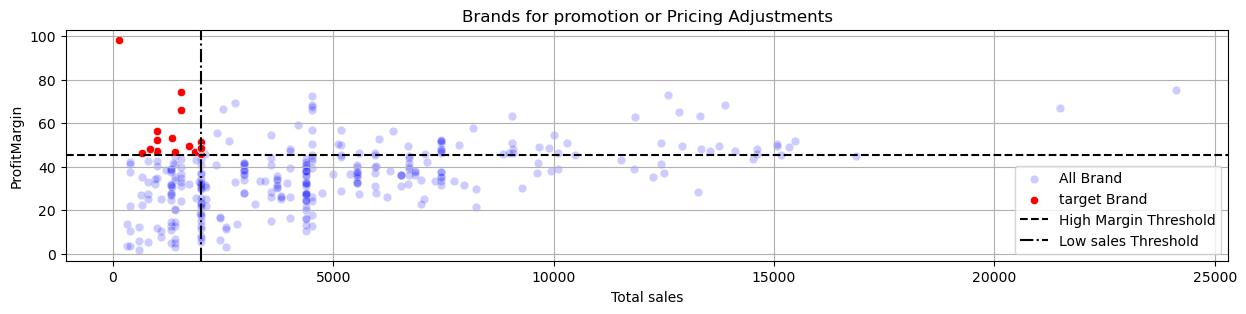

In [134]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=brand_performance,x="totalSalesDollars",y="ProfitMargin",color="blue",label="All Brand",alpha =0.2)
sns.scatterplot(data=targetbrands,x="totalSalesDollars",y="ProfitMargin",color="red",label="target Brand")

plt.axhline(highprofit,linestyle="--",color ="black",label="High Margin Threshold")
plt.axvline(lowsales,linestyle="-.",color="black",label="Low sales Threshold")

plt.xlabel("Total sales")
plt.ylabel("ProfitMargin")
plt.title("Brands for promotion or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendorsand brands demonstrate the highest sales performance?

In [25]:
top_vanders=(df.groupby("VendorName")["totalSalesDollars"].sum()).sort_values(ascending=False).nlargest(10)

In [26]:
top_brands=(df.groupby("Description")["totalSalesDollars"].sum()).sort_values(ascending=False).nlargest(10)
top_brands

Description
Patron Silver Tequila        24109.91
Charles Goodnight Bourbon    21496.49
Black Button Citrus Gin      16866.17
Pinnacle Habanero Vodka      15474.31
Makers Mark Cask Strength    15342.43
Pumpkin Face Rum             15165.21
Pinnacle Mimosa Vodka        15069.52
Skinnygirl Sweet'Arita       15069.52
Skinnygirl Vodka             14624.77
Jim Beam Signature Craft     14624.77
Name: totalSalesDollars, dtype: float64

In [27]:
def format_values(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return f"{value:.2f}"

In [28]:
top_brands.apply(lambda x:format_values(x))

Description
Patron Silver Tequila        24.11K
Charles Goodnight Bourbon    21.50K
Black Button Citrus Gin      16.87K
Pinnacle Habanero Vodka      15.47K
Makers Mark Cask Strength    15.34K
Pumpkin Face Rum             15.17K
Pinnacle Mimosa Vodka        15.07K
Skinnygirl Sweet'Arita       15.07K
Skinnygirl Vodka             14.62K
Jim Beam Signature Craft     14.62K
Name: totalSalesDollars, dtype: object

In [29]:
top_vanders.apply(lambda x:format_values(x))

VendorName
JIM BEAM BRANDS COMPANY       581.18K
DIAGEO NORTH AMERICA INC      293.68K
ULTRA BEVERAGE COMPANY LLP    150.47K
MARTIGNETTI COMPANIES         140.84K
PERNOD RICARD USA             135.36K
BROWN-FORMAN CORP             120.64K
BACARDI USA INC                30.29K
CONSTELLATION BRANDS INC       22.94K
M S WALKER INC                 16.95K
WILLIAM GRANT & SONS INC       15.49K
Name: totalSalesDollars, dtype: object

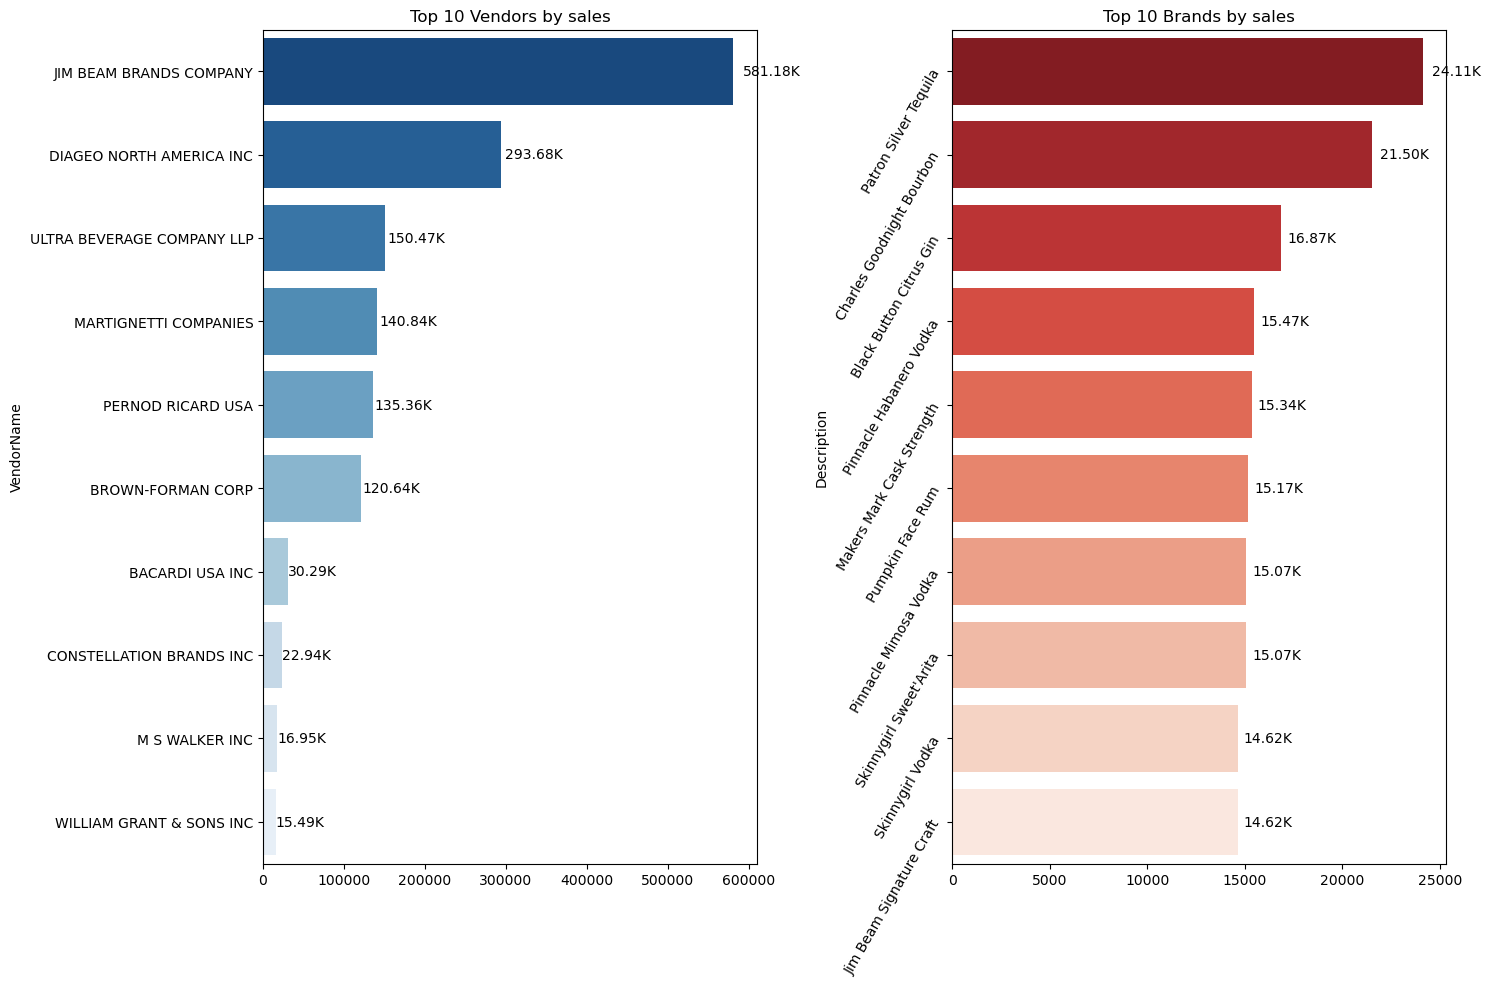

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
ax1=sns.barplot(x=top_vanders.values,y=top_vanders.index, hue=top_vanders.index,palette="Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
                    bar.get_y()+bar.get_height()/2,
                    format_values(bar.get_width()),
                    ha="left",va="center",fontsize=10,color="black")

plt.subplot(1,2,2)
ax2=sns.barplot(x=top_brands.values,y=top_brands.index.astype(str), hue=top_brands.index,palette="Reds_r")
plt.title("Top 10 Brands by sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
                    bar.get_y()+bar.get_height()/2,
                    format_values(bar.get_width()),
                    ha="left",va="center",fontsize=10,color="black")

plt.yticks(rotation=60)
plt.tight_layout()
plt.show()

In [31]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actualprice', 'Volume', 'totalpurchasesquantity',
       'totalpurchasesdollar', 'totalSalesQuantity', 'totalSalesDollars',
       'totalSalesPrice', 'totalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'Salestopurchasesratio'],
      dtype='object')

Which vendor contribute the most to total purchase dollars?

In [33]:
vendor_contributer=df.groupby("VendorName").agg({"totalpurchasesdollar":"sum",
                                                     "GrossProfit":"sum",
                                                     "totalSalesDollars":"sum"}).reset_index()
vendor_contributer

,VendorName,totalpurchasesdollar,GrossProfit,totalSalesDollars
0,BACARDI USA INC,17921.13,12365.09,30286.22
1,BROWN-FORMAN CORP,48621.55,72016.48,120638.03
2,CAMPARI AMERICA,1705.81,603.77,2309.58
3,CONSTELLATION BRANDS INC,8829.74,14110.33,22940.07
4,DIAGEO NORTH AMERICA INC,163629.28,130054.38,293683.66
5,E & J GALLO WINERY,6520.93,6100.71,12621.64
6,EDRINGTON AMERICAS,1257.84,608.48,1866.32
7,HEAVEN HILL DISTILLERIES,1318.28,696.61,2014.89
8,JIM BEAM BRANDS COMPANY,288189.03,292987.23,581176.26
9,M S WALKER INC,9561.98,7386.09,16948.07


In [34]:
vendor_contributer["PurchaseContribution%"]=(vendor_contributer["totalpurchasesdollar"]/vendor_contributer["totalpurchasesdollar"].sum())*100

round function 

In [36]:
vendor_contributer=round(vendor_contributer.sort_values("PurchaseContribution%",ascending=False),2)

In [37]:
top_vendor=vendor_contributer.head(10)
top_vendor["totalpurchasesdollar"]=top_vendor["totalpurchasesdollar"].apply(lambda x:format_values(x))
top_vendor["GrossProfit"]=top_vendor["GrossProfit"].apply(lambda x:format_values(x))
top_vendor["totalSalesDollars"]=top_vendor["totalSalesDollars"].apply(lambda x:format_values(x))

top_vendor


C:\Users\HP\AppData\Local\Temp\ipykernel_19092\2832944788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendor["totalpurchasesdollar"]=top_vendor["totalpurchasesdollar"].apply(lambda x:format_values(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19092\2832944788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendor["GrossProfit"]=top_vendor["GrossProfit"].apply(lambda x:format_values(x))
C:\Users\HP\AppData\Local\Temp\ipykernel_19092\2832944788.py:4: SettingWithCopyWarning: 
A value is tryi

,VendorName,totalpurchasesdollar,GrossProfit,totalSalesDollars,PurchaseContribution%
8,JIM BEAM BRANDS COMPANY,288.19K,292.99K,581.18K,37.30
4,DIAGEO NORTH AMERICA INC,163.63K,130.05K,293.68K,21.18
20,ULTRA BEVERAGE COMPANY LLP,71.78K,78.68K,150.47K,9.29
10,MARTIGNETTI COMPANIES,65.23K,75.61K,140.84K,8.44
14,PERNOD RICARD USA,62.69K,72.67K,135.36K,8.12
1,BROWN-FORMAN CORP,48.62K,72.02K,120.64K,6.29
0,BACARDI USA INC,17.92K,12.37K,30.29K,2.32
21,WILLIAM GRANT & SONS INC,9.67K,5.82K,15.49K,1.25
9,M S WALKER INC,9.56K,7.39K,16.95K,1.24
3,CONSTELLATION BRANDS INC,8.83K,14.11K,22.94K,1.14


In [38]:
vendor_contributer

,VendorName,totalpurchasesdollar,GrossProfit,totalSalesDollars,PurchaseContribution%
8,JIM BEAM BRANDS COMPANY,288189.03,292987.23,581176.26,37.30
4,DIAGEO NORTH AMERICA INC,163629.28,130054.38,293683.66,21.18
20,ULTRA BEVERAGE COMPANY LLP,71782.98,78684.51,150467.49,9.29
10,MARTIGNETTI COMPANIES,65229.30,75612.94,140842.24,8.44
14,PERNOD RICARD USA,62691.41,72665.78,135357.19,8.12
1,BROWN-FORMAN CORP,48621.55,72016.48,120638.03,6.29
0,BACARDI USA INC,17921.13,12365.09,30286.22,2.32
21,WILLIAM GRANT & SONS INC,9665.77,5823.25,15489.02,1.25
9,M S WALKER INC,9561.98,7386.09,16948.07,1.24
3,CONSTELLATION BRANDS INC,8829.74,14110.33,22940.07,1.14


In [39]:
top_vendor["cummulative_contribution%"]=top_vendor["PurchaseContribution%"].cumsum()
top_vendor

C:\Users\HP\AppData\Local\Temp\ipykernel_19092\901924596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendor["cummulative_contribution%"]=top_vendor["PurchaseContribution%"].cumsum()


,VendorName,totalpurchasesdollar,GrossProfit,totalSalesDollars,PurchaseContribution%,cummulative_contribution%
8,JIM BEAM BRANDS COMPANY,288.19K,292.99K,581.18K,37.30,37.30
4,DIAGEO NORTH AMERICA INC,163.63K,130.05K,293.68K,21.18,58.48
20,ULTRA BEVERAGE COMPANY LLP,71.78K,78.68K,150.47K,9.29,67.77
10,MARTIGNETTI COMPANIES,65.23K,75.61K,140.84K,8.44,76.21
14,PERNOD RICARD USA,62.69K,72.67K,135.36K,8.12,84.33
1,BROWN-FORMAN CORP,48.62K,72.02K,120.64K,6.29,90.62
0,BACARDI USA INC,17.92K,12.37K,30.29K,2.32,92.94
21,WILLIAM GRANT & SONS INC,9.67K,5.82K,15.49K,1.25,94.19
9,M S WALKER INC,9.56K,7.39K,16.95K,1.24,95.43
3,CONSTELLATION BRANDS INC,8.83K,14.11K,22.94K,1.14,96.57


In [40]:
# Save to CSV
top_vendor.to_excel("top_vendor.xlsx", index=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_19092\3601160085.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


<Figure size 1600x1000 with 0 Axes>

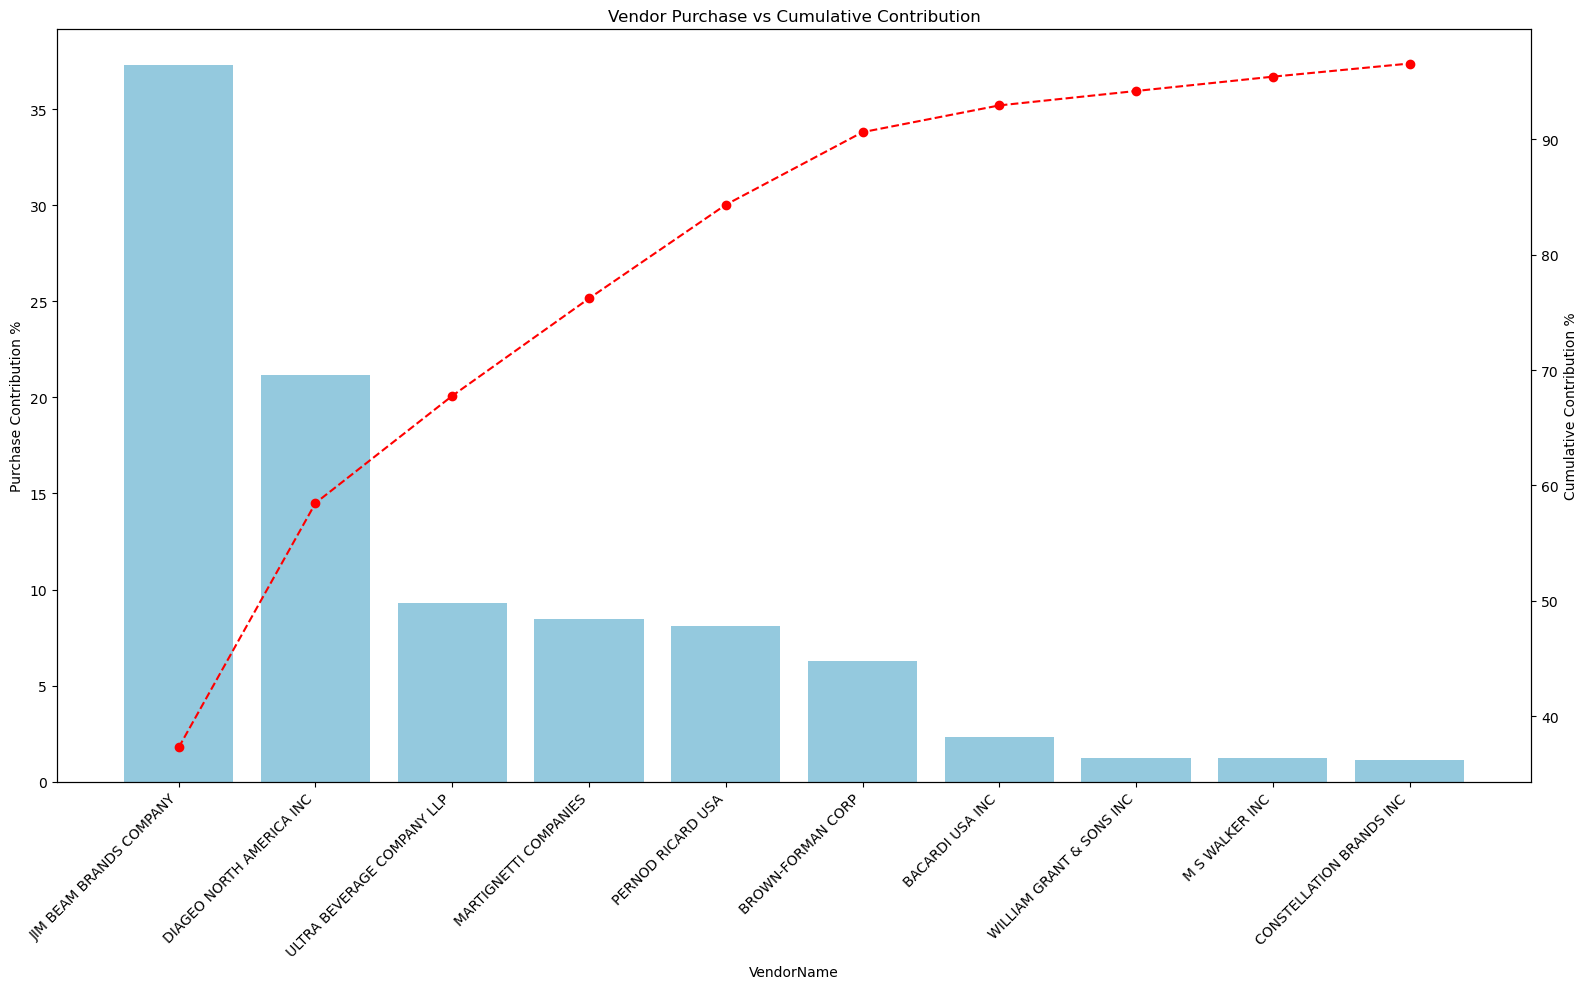

In [41]:
plt.figure(figsize=(16, 10))

# Create twin axes for different scales
fig, ax1 = plt.subplots(figsize=(16, 10))

# Bar plot for Purchase Contribution
sns.barplot(
    x="VendorName",
    y="PurchaseContribution%",
    data=top_vendor,
    color="skyblue",
    ax=ax1
)
ax1.set_ylabel("Purchase Contribution %", color="black")
#ax1.tick_params(axis="y", labelcolor="blue")

# Rotate vendor names for readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Secondary axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(
    top_vendor["VendorName"],
    top_vendor["cummulative_contribution%"],
    color="red",
    linestyle="--",
    marker="o"
)
ax2.set_ylabel("Cumulative Contribution %", color="black")
#ax2.tick_params(axis="y", labelcolor="red")

plt.title("Vendor Purchase vs Cumulative Contribution")
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendor?

In [43]:
print(f"Total Purchase Contribution of top vendor is{round(top_vendor["PurchaseContribution%"].sum(),2)}%")

Total Purchase Contribution of top vendor is96.57%


In [44]:
 top_vendor["VendorName"].values


array(['JIM BEAM BRANDS COMPANY', 'DIAGEO NORTH AMERICA INC',
       'ULTRA BEVERAGE COMPANY LLP', 'MARTIGNETTI COMPANIES',
       'PERNOD RICARD USA', 'BROWN-FORMAN CORP', 'BACARDI USA INC',
       'WILLIAM GRANT & SONS INC', 'M S WALKER INC',
       'CONSTELLATION BRANDS INC'], dtype=object)

Does purchasing in bulk reduce the unit price,and what is the optimal purchase volume for cost saving?

In [46]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actualprice', 'Volume', 'totalpurchasesquantity',
       'totalpurchasesdollar', 'totalSalesQuantity', 'totalSalesDollars',
       'totalSalesPrice', 'totalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'Salestopurchasesratio'],
      dtype='object')

In [47]:
df["unitpurchaseprice"]=df["totalpurchasesdollar"]/df["totalpurchasesquantity"]

In [48]:
 df["ordersize"]=pd.qcut(df["totalpurchasesquantity"],q=3,labels=["small","medium","large"])

In [49]:
df.groupby("ordersize")[["unitpurchaseprice"]].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_19092\1020090331.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("ordersize")[["unitpurchaseprice"]].mean()


,unitpurchaseprice
ordersize,
small,29.645858
medium,18.921499
large,12.697278


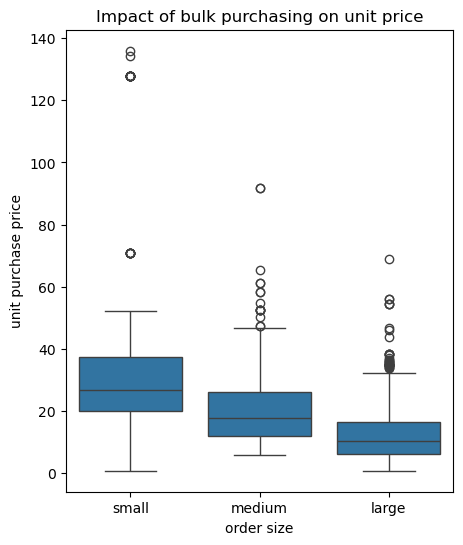

In [50]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df,x="ordersize",y="unitpurchaseprice")
plt.xlabel("order size")
plt.ylabel("unit purchase price")
plt.title("Impact of bulk purchasing on unit price")
plt.tight_layout
plt.show()

which vendor have low iinventory turnover ,indicating excess stock and slow_moving products?

In [52]:
df[df['StockTurnover']<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values(by="StockTurnover",ascending=True).head(10)

,StockTurnover
VendorName,
CAMPARI AMERICA,0.331970
PERNOD RICARD USA,0.355754
BROWN-FORMAN CORP,0.401660
BACARDI USA INC,0.421491
MOET HENNESSY USA INC,0.453333
DIAGEO NORTH AMERICA INC,0.455056
SAZERAC CO INC,0.458333
ULTRA BEVERAGE COMPANY LLP,0.476404
WILLIAM GRANT & SONS INC,0.481107


In [53]:
col_df=df[df["totalpurchasesquantity"]>=df["totalSalesQuantity"]]

How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [55]:
col_df["unsoldinventory"]=(col_df["totalpurchasesquantity"] - col_df["totalSalesQuantity"])*col_df["PurchasePrice"]
print("capital is locked in unsold inventory :",format_values(col_df["unsoldinventory"].sum()))

capital is locked in unsold inventory : 171.62K


C:\Users\HP\AppData\Local\Temp\ipykernel_19092\2097442192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_df["unsoldinventory"]=(col_df["totalpurchasesquantity"] - col_df["totalSalesQuantity"])*col_df["PurchasePrice"]


In [56]:
col_df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Actualprice', 'Volume', 'totalpurchasesquantity',
       'totalpurchasesdollar', 'totalSalesQuantity', 'totalSalesDollars',
       'totalSalesPrice', 'totalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'Salestopurchasesratio',
       'unitpurchaseprice', 'ordersize', 'unsoldinventory'],
      dtype='object')

In [57]:
col_df.to_excel("lowturnovervendor.xlsx", index=False)


In [58]:
inventory_value_per_vendor=col_df.groupby("VendorName")["unsoldinventory"].sum().reset_index()

In [59]:
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="unsoldinventory",ascending=False)

In [60]:
inventory_value_per_vendor["unsoldinventory"]=inventory_value_per_vendor["unsoldinventory"].apply(lambda x:format_values(x))
inventory_value_per_vendor.head(10)

,VendorName,unsoldinventory
8,JIM BEAM BRANDS COMPANY,59.43K
4,DIAGEO NORTH AMERICA INC,55.12K
13,PERNOD RICARD USA,16.59K
1,BROWN-FORMAN CORP,15.83K
0,BACARDI USA INC,10.02K
19,WILLIAM GRANT & SONS INC,4.09K
10,MARTIGNETTI COMPANIES,3.47K
18,ULTRA BEVERAGE COMPANY LLP,3.32K
9,M S WALKER INC,1.09K
2,CAMPARI AMERICA,1.01K


What is 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [136]:
df["unsoldinventory"]=col_df["unsoldinventory"].copy()

In [138]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,totalpurchasesquantity,totalpurchasesdollar,totalSalesQuantity,...,totalSalesPrice,totalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchasesratio,unitpurchaseprice,ordersize,unsoldinventory
0,1128,BROWN-FORMAN CORP,1595,Gentleman Jack,10.93,15.99,375,290.0,3169.70,100.0,...,647.82,183.74,3854.06,429.30,11.928313,0.344828,1.135439,10.93,large,2076.70
1,1128,BROWN-FORMAN CORP,2518,Woodford Reserve Double Oak,36.49,49.99,750,84.0,3065.16,100.0,...,647.82,183.74,3854.06,533.84,14.833009,1.190476,1.174164,36.49,large,NaN
2,1128,BROWN-FORMAN CORP,1465,Woodford Rsv Bourbon,11.02,14.99,375,242.0,2666.84,100.0,...,647.82,183.74,3854.06,932.16,25.900528,0.413223,1.349537,11.02,large,1564.84
3,1128,BROWN-FORMAN CORP,62,Herradura Silver Tequila,28.67,36.99,750,90.0,2580.30,100.0,...,647.82,183.74,3854.06,1018.70,28.305085,1.111111,1.394799,28.67,large,NaN
4,17035,PERNOD RICARD USA,1896,The Glenlivet 18 Yr Single,68.83,94.99,750,36.0,2477.88,107.0,...,597.75,84.25,4993.54,81.05,3.167339,2.972222,1.032709,68.83,large,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,...,97.93,1.33,3151.86,156.61,93.286872,12.000000,14.896185,11.27,small,NaN
2125,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,3.0,...,110.97,2.37,3151.86,99.70,89.844102,3.000000,9.846495,11.27,small,NaN
2126,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,...,63.12,1.33,3151.86,83.41,88.096747,12.000000,8.401065,11.27,small,NaN
2127,8664,"STOLI GROUP,(USA) LLC",3147,Stolichnaya Chocolat Kokonut,0.71,0.99,50,1.0,0.71,14.0,...,95.88,0.70,1234.46,111.15,99.365278,14.000000,157.549296,0.71,small,NaN


In [140]:
df['unsoldinventory'] = df['unsoldinventory'].fillna(0)


In [142]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,totalpurchasesquantity,totalpurchasesdollar,totalSalesQuantity,...,totalSalesPrice,totalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchasesratio,unitpurchaseprice,ordersize,unsoldinventory
0,1128,BROWN-FORMAN CORP,1595,Gentleman Jack,10.93,15.99,375,290.0,3169.70,100.0,...,647.82,183.74,3854.06,429.30,11.928313,0.344828,1.135439,10.93,large,2076.70
1,1128,BROWN-FORMAN CORP,2518,Woodford Reserve Double Oak,36.49,49.99,750,84.0,3065.16,100.0,...,647.82,183.74,3854.06,533.84,14.833009,1.190476,1.174164,36.49,large,0.00
2,1128,BROWN-FORMAN CORP,1465,Woodford Rsv Bourbon,11.02,14.99,375,242.0,2666.84,100.0,...,647.82,183.74,3854.06,932.16,25.900528,0.413223,1.349537,11.02,large,1564.84
3,1128,BROWN-FORMAN CORP,62,Herradura Silver Tequila,28.67,36.99,750,90.0,2580.30,100.0,...,647.82,183.74,3854.06,1018.70,28.305085,1.111111,1.394799,28.67,large,0.00
4,17035,PERNOD RICARD USA,1896,The Glenlivet 18 Yr Single,68.83,94.99,750,36.0,2477.88,107.0,...,597.75,84.25,4993.54,81.05,3.167339,2.972222,1.032709,68.83,large,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,...,97.93,1.33,3151.86,156.61,93.286872,12.000000,14.896185,11.27,small,0.00
2125,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,3.0,...,110.97,2.37,3151.86,99.70,89.844102,3.000000,9.846495,11.27,small,0.00
2126,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,12.0,...,63.12,1.33,3151.86,83.41,88.096747,12.000000,8.401065,11.27,small,0.00
2127,8664,"STOLI GROUP,(USA) LLC",3147,Stolichnaya Chocolat Kokonut,0.71,0.99,50,1.0,0.71,14.0,...,95.88,0.70,1234.46,111.15,99.365278,14.000000,157.549296,0.71,small,0.00


In [144]:
#df.to_excel("vendor.xlsx", index=False)

In [68]:
col_df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actualprice,Volume,totalpurchasesquantity,totalpurchasesdollar,totalSalesQuantity,...,totalSalesPrice,totalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchasesratio,unitpurchaseprice,ordersize,unsoldinventory
0,1128,BROWN-FORMAN CORP,1595,Gentleman Jack,10.93,15.99,375,290.0,3169.70,100.0,...,647.82,183.74,3854.06,429.30,11.928313,0.344828,1.135439,10.93,large,2076.70
2,1128,BROWN-FORMAN CORP,1465,Woodford Rsv Bourbon,11.02,14.99,375,242.0,2666.84,100.0,...,647.82,183.74,3854.06,932.16,25.900528,0.413223,1.349537,11.02,large,1564.84
5,12546,JIM BEAM BRANDS COMPANY,4416,Cruzan Coconut Flavored Rum,7.68,9.99,750,296.0,2273.28,106.0,...,526.77,194.77,7555.42,149.66,6.176793,0.358108,1.065834,7.68,large,1459.20
6,17035,PERNOD RICARD USA,2917,Paddy's Irish Whiskey,15.62,19.99,750,145.0,2264.90,107.0,...,597.75,84.25,4993.54,294.03,11.490349,0.737931,1.129820,15.62,large,593.56
8,17035,PERNOD RICARD USA,859,Beefeater Gin,17.29,22.99,1000,130.0,2247.70,107.0,...,597.75,84.25,4993.54,311.23,12.162505,0.823077,1.138466,17.29,large,397.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,1.0,...,15.99,0.11,3151.86,4.72,29.518449,1.000000,1.418811,11.27,small,0.00
2099,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,1.0,...,29.99,0.79,3151.86,18.72,62.420807,1.000000,2.661047,11.27,small,0.00
2106,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,1.0,...,31.99,0.79,3151.86,20.72,64.770241,1.000000,2.838509,11.27,small,0.00
2114,9165,ULTRA BEVERAGE COMPANY LLP,3084,Patron Silver Tequila,11.27,14.99,200,1.0,11.27,1.0,...,69.99,0.79,3151.86,58.72,83.897700,1.000000,6.210293,11.27,small,0.00
